# Airbnb Pricing Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [2]:
df_listing_final=pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/New folder/df_listing_final3.csv')
df_listing_final.head()

,Unnamed: 0,host_response_time,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,3,4,1.000000,5371,-34.509717,138.816127,2,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
1,5,4,1.000000,5118,-34.605631,138.648229,3,1.0,1.0,2.0,...,0,0,1,0,0,0,1,0,1,0
2,8,4,1.000000,5355,-34.488111,138.924490,16,8.0,8.0,1.0,...,0,0,0,1,0,0,1,0,1,0
3,9,0,0.951288,5353,-34.499428,139.044344,2,1.0,1.0,1.0,...,0,1,0,0,0,0,1,0,1,0
4,12,2,0.500000,5355,-34.472304,139.009037,2,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0


In [3]:
df_listing_final.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegressionCV, LassoCV, Lasso, LinearRegression, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Sampling

In [5]:
# select only 20,000 sample due to the laptop cannot hand
df_sample = df_listing_final.sample(n=20000)

## Average Price

In [ ]:
df_listing_final.price.mean() 

### Defined X and Y

In [6]:

ss = StandardScaler()

X = df_sample.drop(['price'], axis=1)
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
y = df_sample.price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

Xs_train = pd.DataFrame(ss.fit_transform(X_train), columns=X.columns)
Xs_test = pd.DataFrame(ss.fit_transform(X_test), columns=X.columns)

### KNeighbors Regressor (KNN)- Find the best k

In [7]:
def find_best_k_cls(Xs_train, y_train, k_min=1, k_max=20, step=2, cv=5):
    k_range = range(k_min, k_max+1, step)
    accs = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, Xs_train, y_train, cv=cv)
        accs.append(np.mean(scores))
    print np.max(accs), np.argmax(k_range)
    return np.argmax(k_range)
find_best_k_cls(Xs_train, y_train)

0.4749350250430811 9


9

# Model used 

### 1. LinearRegression
### 2. RidgeCV
### 3. LassoCV
### 4. ElasticNetCV
### 5. BayesianRidge 
### 6. GridSearch and SGDRegressor
### 7. RandomizedSearchCV and RandomForestRegressor
### 8. GridSearchCV and XGBRegressor


## Linear Regression Model

In [9]:
# Set the parameters
lr = LinearRegression(fit_intercept=True)

# Fit linear model
lr.fit(Xs_train, y_train)


# print "LinearRegression- Train R2 score:", lr.score(Xs_train, y_train)
print "LinearRegression- Test R2 score:", lr.score(Xs_test, y_test)

LinearRegression- Test R2 score: -5.27135543476349e+24


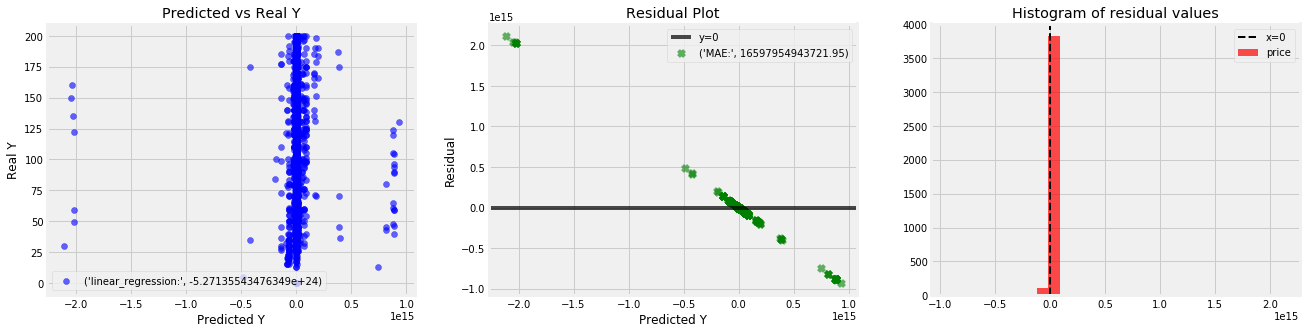

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(lr.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", lr.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(lr.predict(Xs_test), y_test-lr.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, lr.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - lr.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [11]:
#Cross-validate the linear R2
lr_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':lr.coef_,
                            'abs_coef':np.abs(lr.coef_)})

lr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lr_coefs.head(20)

,abs_coef,coef,variable
68,5.409025e+14,5.409025e+14,room_type_Entire home/apt
69,5.386064e+14,5.386064e+14,room_type_Private room
75,5.205805e+14,-5.205805e+14,bed_type_Real Bed
74,3.320287e+14,-3.320287e+14,bed_type_Pull-out Sofa
73,3.182279e+14,-3.182279e+14,bed_type_Futon
78,2.727799e+14,-2.727799e+14,cancellation_policy_flexible
80,2.665470e+14,-2.665470e+14,cancellation_policy_strict_14_with_grace_period
79,2.543276e+14,-2.543276e+14,cancellation_policy_moderate
77,2.254763e+14,-2.254763e+14,instant_bookable_t
76,2.254763e+14,-2.254763e+14,instant_bookable_f


### Linear Regression Analysis

We could see very extremely negative R2 score on the linear regression. Further, we can also see that the residual plots do not performing well as the residuals are not normally distributed residuals are indeed not normally distributed.

## Ridge Regression

In [12]:
rr = RidgeCV(alphas=10.**np.linspace(-10, 5, 10), fit_intercept=True)

rr.fit(Xs_train, y_train)

print "Ridge Regression- Test R2 score:", rr.score(Xs_test, y_test)

Ridge Regression- Test R2 score: 0.4985871236615696


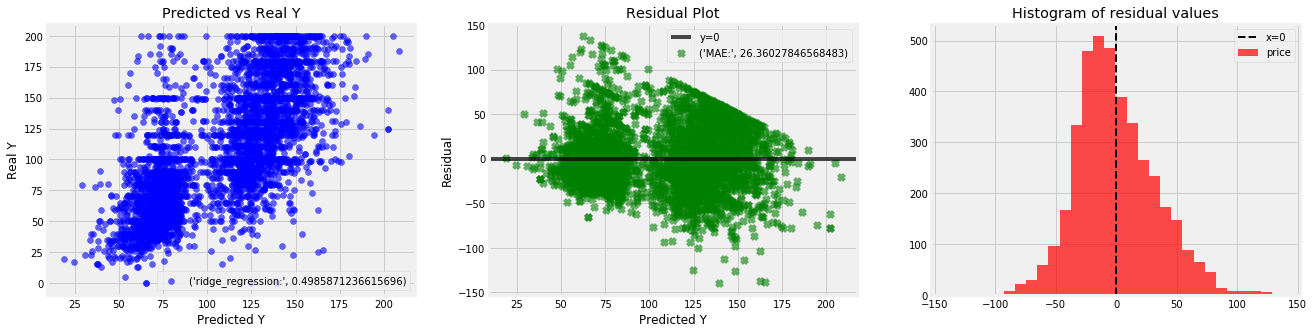

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(rr.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("ridge_regression:", rr.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rr.predict(Xs_test), y_test-rr.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rr.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - rr.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [14]:
#Cross-validate the linear R2 with the optimal alpha
rr_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':rr.coef_,
                            'abs_coef':np.abs(rr.coef_)})

rr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

rr_coefs.head(20)

,abs_coef,coef,variable
5,14.567036,14.567036,accommodates
68,12.376034,12.376034,room_type_Entire home/apt
69,10.910550,-10.910550,room_type_Private room
4,8.602017,8.602017,longitude
70,5.876466,-5.876466,room_type_Shared room
8,5.106109,-5.106109,beds
27,4.765417,4.765417,property_type_Bed and breakfast
2,3.783597,3.783597,zipcode
3,3.297472,3.297472,latitude
34,2.632099,-2.632099,property_type_Campsite


### Ridge Regression Analysis
Ridge adds penalty equivalent to $square$ $of$ $the magnitude$ $of$ $coefficients$. We could see that the ridge regression perform better than linear regression as it achieved a R2 score of nearly 50% and a Mean Absolute Error of AUD 26.36 where the the average price is around AUD 106.26.

## Lasso Regression

In [15]:
#Find the best alpha parameter through cross-validation
optimal_lasso = LassoCV(n_alphas=500, cv=9, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.06971543512463822


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.7s finished


In [16]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(Xs_train, y_train)

print "Lasso Regression- Test R2 score:", lasso.score(Xs_test, y_test)

Lasso Regression- Test R2 score: 0.4982477267336771


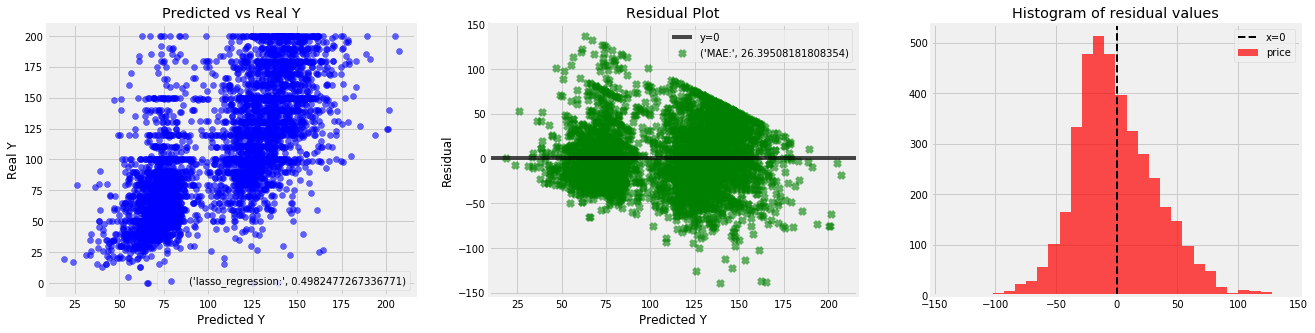

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(lasso.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("lasso_regression:", lasso.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(lasso.predict(Xs_test), y_test-lasso.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, lasso.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - lasso.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

### Lasso Regression Analysis
Lasso adds penalty equivalent to $absolute$ $value$ $of$ $the magnitude$ $of$ $coefficients$. However, we could see that the performance of the lasso regression is very close to ridge.

In [18]:
#Cross-validate the linear R2 with the optimal alpha
lasso_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
68,23.350422,23.350422,room_type_Entire home/apt
5,14.288134,14.288134,accommodates
4,8.025090,8.025090,longitude
27,4.696607,4.696607,property_type_Bed and breakfast
8,4.675536,-4.675536,beds
2,3.162617,3.162617,zipcode
70,3.037480,-3.037480,room_type_Shared room
3,2.984671,2.984671,latitude
34,2.738240,-2.738240,property_type_Campsite
29,2.458321,2.458321,property_type_Boutique hotel


## ElasticNet Regression

In [19]:
elastic = ElasticNetCV()

elastic.fit(Xs_train, y_train)

print "Elastic Regression- Test R2 score:", elastic.score(Xs_test, y_test)

Elastic Regression- Test R2 score: 0.4972050355081209


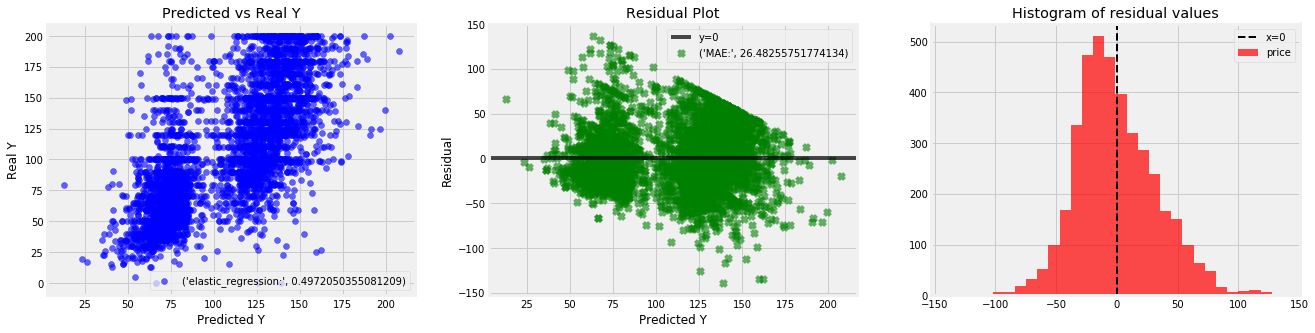

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(elastic.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("elastic_regression:", elastic.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(elastic.predict(Xs_test), y_test-elastic.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, elastic.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - elastic.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [21]:
elastic_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':elastic.coef_,
                            'abs_coef':np.abs(elastic.coef_)})

elastic_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elastic_coefs.head(20)

,abs_coef,coef,variable
5,13.050931,13.050931,accommodates
68,12.424241,12.424241,room_type_Entire home/apt
69,10.683957,-10.683957,room_type_Private room
4,7.241769,7.241769,longitude
70,5.792477,-5.792477,room_type_Shared room
27,4.571933,4.571933,property_type_Bed and breakfast
8,3.511033,-3.511033,beds
34,3.200607,-3.200607,property_type_Campsite
7,2.624200,2.624200,bedrooms
3,2.613217,2.613217,latitude


### Elastic Net Regression Analysis
Elastic Net finds the ridge regression coefficients, and then does a lasso type shrinkage. However, we could see that the performance of the elastic net regression is very close to ridge and lasso. 

## BayesianRidge

In [22]:
bayes = BayesianRidge()

bayes.fit(Xs_train, y_train)

print "Bayesian Ridge Regression- Test R2 score:", bayes.score(Xs_test, y_test)

Bayesian Ridge Regression- Test R2 score: 0.4984383005385409


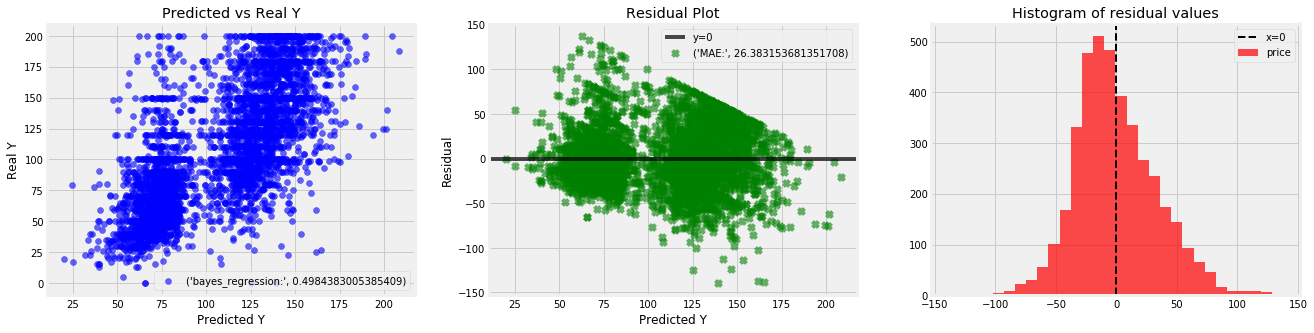

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(bayes.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("bayes_regression:", bayes.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(bayes.predict(Xs_test), y_test-bayes.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, bayes.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - bayes.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

### Bayesian Ridge Regression Analysis

Bayesian ridge optimize the regularization parameters lambda (precision of the weights) and alpha (precision of the noise). However, we could see that the performance of the elastic net regression is very close to other regression models used so far.

In [24]:
bayes_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':bayes.coef_,
                            'abs_coef':np.abs(bayes.coef_)})

bayes_coefs.sort_values('abs_coef', inplace=True, ascending=False)

bayes_coefs.head(20)

,abs_coef,coef,variable
5,14.199621,14.199621,accommodates
68,12.360797,12.360797,room_type_Entire home/apt
69,10.895976,-10.895976,room_type_Private room
4,8.305500,8.305500,longitude
70,5.873646,-5.873646,room_type_Shared room
27,4.736121,4.736121,property_type_Bed and breakfast
8,4.725659,-4.725659,beds
2,3.504024,3.504024,zipcode
3,3.149755,3.149755,latitude
34,2.780597,-2.780597,property_type_Campsite


### GridSearch and SGDRegressor

In [31]:
tuned_parameters = {'alpha': np.linspace(0,1,25), 
                   'penalty': ['l1', 'l2'],
                   'loss': ['squared_loss','huber']}

sgd_reg = SGDRegressor()
sgd_reg_gs = GridSearchCV(sgd_reg, tuned_parameters, cv=9, verbose=False)

In [32]:
sgd_reg_gs.fit(Xs_train, y_train)

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=9, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([0.     , 0.04167, 0.08333, 0.125  , 0.16667, 0.20833, 0.25   ,
       0.29167, 0.33333, 0.375  , 0.41667, 0.45833, 0.5    , 0.54167,
       0.58333, 0.625  , 0.66667, 0.70833, 0.75   , 0.79167, 0.83333,
       0.875  , 0.91667, 0.95833, 1.     ]), 'loss': ['squared_loss', 'huber']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [33]:
print sgd_reg_gs.best_params_
print sgd_reg_gs.best_score_
sgd_reg = sgd_reg_gs.best_estimator_

{'penalty': 'l2', 'alpha': 0.625, 'loss': 'squared_loss'}
0.452802576647


In [34]:
sgd_reg

SGDRegressor(alpha=0.625, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [35]:
print "SGD Regression- Test R2 score:", sgd_reg_gs.score(Xs_test, y_test)

SGD Regression- Test R2 score: 0.4450259270957879


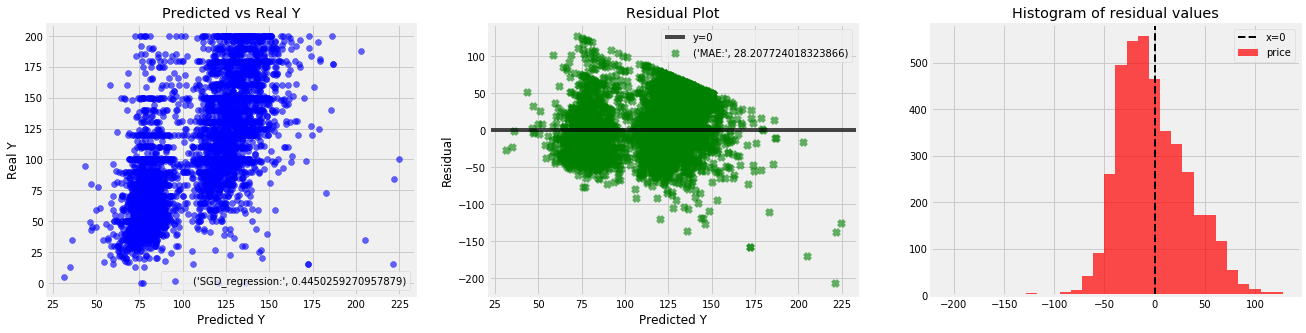

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(sgd_reg_gs.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("SGD_regression:", sgd_reg_gs.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(sgd_reg_gs.predict(Xs_test), y_test-sgd_reg_gs.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, sgd_reg_gs.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - sgd_reg_gs.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [37]:
value_coefs = pd.DataFrame({'coef':sgd_reg.coef_,
                            'abs_coef':np.abs(sgd_reg.coef_),
                            'variable':Xs_train.columns})
value_coefs.sort_values('abs_coef', ascending=False, inplace=True)
value_coefs.head(20)

,abs_coef,coef,variable
68,9.669578,9.669578,room_type_Entire home/apt
69,8.694162,-8.694162,room_type_Private room
5,7.214240,7.214240,accommodates
70,3.934965,-3.934965,room_type_Shared room
7,3.931141,3.931141,bedrooms
27,2.693366,2.693366,property_type_Bed and breakfast
4,2.115335,2.115335,longitude
80,2.023739,2.023739,cancellation_policy_strict_14_with_grace_period
64,1.766467,1.766467,property_type_Treehouse
29,1.623710,1.623710,property_type_Boutique hotel


## GridSearch and SGD Regression Analysis

GridSearch exhaustively search over parameter values for an estimator then Stochastic Gradient Descent regressor minimizing a regularized empirical loss. However, this regression model do not perform better than other models.

## RandomizedSearchCV and RandomForestRegressor

In [38]:
#use a randomized search due to large number of parameters
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

In [39]:
rf = RandomForestRegressor()
# Random search of parameters, using 9 fold cross validation, 
# search across 1800 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 9, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs_train, y_train)
print rf_random.best_score_
print rf_random.best_params_

Fitting 9 folds for each of 200 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.8min finished


0.5612409118690735
{'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2}


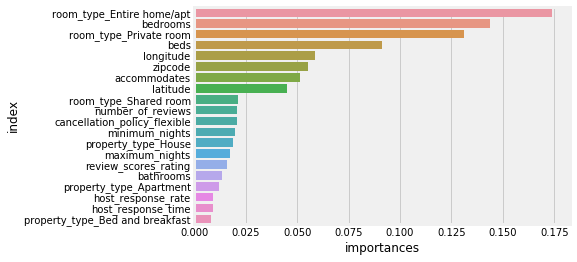

In [67]:
rf2 = RandomForestRegressor(min_samples_split= 10,
                             max_features= 'sqrt',
                             bootstrap= False,
                             max_depth= 30,
                             min_samples_leaf= 2)
rf2.fit(Xs_train, y_train)
importances = rf2.feature_importances_
std = np.std([rf2.feature_importances_ for tree in rf2.estimators_],
             axis=0)
fea_imp = pd.DataFrame(zip(importances,std), Xs_train.columns.values, columns = ['importances', 'std'])
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:20])

In [68]:
print "Random Forest Regression- Test R2 score:", rf2.score(Xs_test, y_test)

Random Forest Regression- Test R2 score: 0.5244086785096309


In [69]:
fea_imp.head(20)

,index,importances,std
0,room_type_Entire home/apt,0.173951,0.000000e+00
1,bedrooms,0.143866,0.000000e+00
2,room_type_Private room,0.131185,2.775558e-17
3,beds,0.091478,0.000000e+00
4,longitude,0.058485,0.000000e+00
5,zipcode,0.055307,0.000000e+00
6,accommodates,0.051569,0.000000e+00
7,latitude,0.045239,6.938894e-18
8,room_type_Shared room,0.021469,0.000000e+00
9,number_of_reviews,0.021028,0.000000e+00


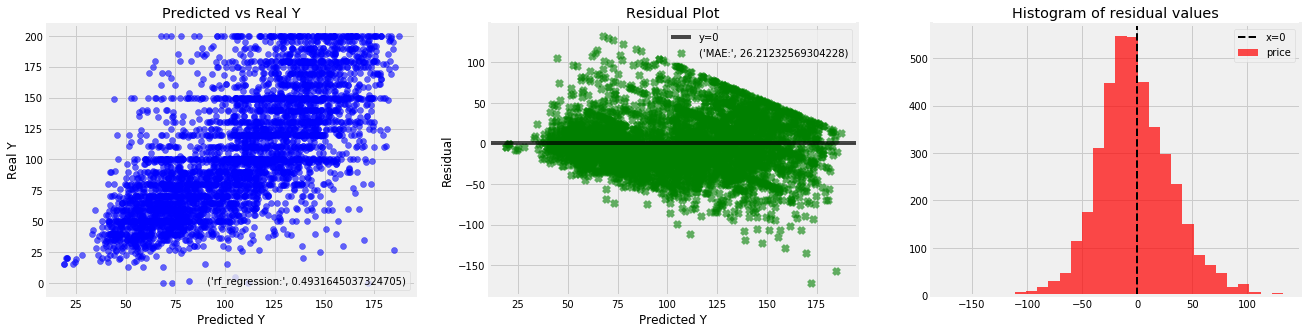

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(rf2.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("rf_regression:", rf2.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rf2.predict(Xs_test), y_test-rf2.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - rf2.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

### RandomizedSearchCV and Random Forest Regressor Analysis
RandomizedSearch CV randomly search for hyper parameters and a random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. This model perform slightly better than other models used.  

### How random forest works?

A random seed is choson which pulls out at random a collection of samples from training dataset while maintaining the class distribution.

With this selected dataset, a random set of attributes from original dataset is chosen based on user defined values. All the input variables are not considered because of enormous computation and high chance of overfitting.

In a dataset , where M is the total number of input attribute in the dataset, only m attributes are chosen at random for each tree where m < M.

The attribute for this set creates the best possible split using the gini index to develop a decision tree model. This processes repeats for each of the branches until the the leaves are the nodes that are too small to split.

## GridSearchCV and XGBRegressor

In [44]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 9,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(Xs_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 9 folds for each of 9 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  5.8min finished


0.598083226819
{'colsample_bytree': 0.7, 'silent': 1, 'learning_rate': 0.03, 'nthread': 4, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7, 'objective': 'reg:linear', 'max_depth': 7}


In [46]:
xgb = XGBRegressor(colsample_bytree = 0.7, silent = 1, learning_rate = 0.03, nthread = 4, min_child_weight = 4, n_estimators = 500, subsample = 0.7, objective = 'reg:linear', max_depth = 7)

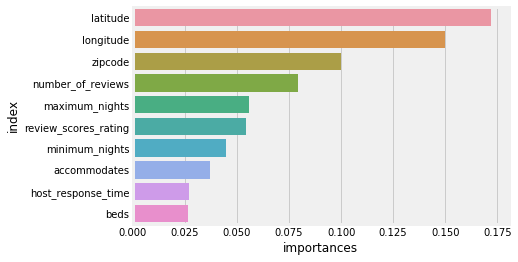

In [47]:
folds = 9
param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2)
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(Xs_train, y_train), verbose=3, random_state=99 )
# # Here we go
xgb.fit(Xs_train, y_train)

importances = xgb.feature_importances_
fea_imp_1 = pd.DataFrame(importances, Xs_train.columns.values, columns = ['importances'])
fea_imp_1 = fea_imp_1.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp_1[:10])

In [48]:
fea_imp_1.head(10)

,index,importances
0,latitude,0.171974
1,longitude,0.149692
2,zipcode,0.100159
3,number_of_reviews,0.079534
4,maximum_nights,0.055814
5,review_scores_rating,0.054470
6,minimum_nights,0.044783
7,accommodates,0.036845
8,host_response_time,0.027095
9,beds,0.026595


In [49]:
print "XGB Regression- Test R2 score:", xgb.score(Xs_test, y_test)

XGB Regression- Test R2 score: 0.5274618111586954


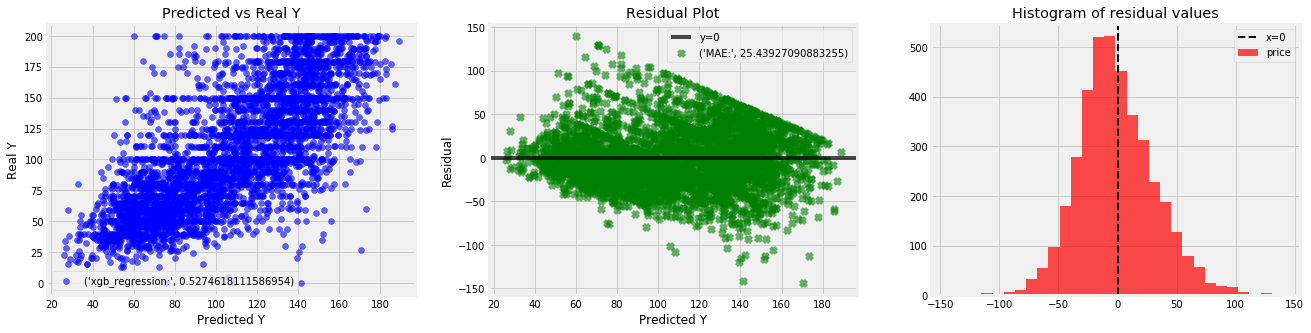

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(xgb.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("xgb_regression:", xgb.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(xgb.predict(Xs_test), y_test-xgb.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - xgb.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

### GridSearchCV and XGBRegressor Analysis
Boosting is a fairly simple variation on bagging that strives to improve the learners by focusing on area where the system is not performing well. This model performed the best among all the model used

### How XGboost works?
By sequentially learning from the error of the previous trees and focuses on reducing error in the next tree. Gradient Boosting try to 'learn' the unconditional distribution of the target variable. So, analogus to how we use different types of ditribution in generalized linear modeling (non-linear). Gradient boosting model creates the distribution in the given data as close as possibe.

## R square score for top 5 regression models

In [70]:
lr_columns = lr_coefs.variable.values
rr_columns = rr_coefs.variable.values
lasso_columns = lasso_coefs.variable.values
elastic_columns = elastic_coefs.variable.values
bayes_columns = bayes_coefs.variable.values
sgd_reg_columns = value_coefs.variable.values
rf_random_columns = fea_imp['index'].values
xgb_columns = fea_imp_1['index'].values

In [71]:
# Defining functions to test our best features head to head.

def score_lasso_2(Xs_test):
    scores_lasso_2 = cross_val_score(lasso, Xs_test, y_test, cv=9)
    return scores_lasso_2.mean(), scores_lasso_2.std()

def score_elastic_2(Xs_test):
    scores_elastic_2 = cross_val_score(elastic, Xs_test, y_test, cv=9)
    return scores_elastic_2.mean(), scores_elastic_2.std()

def score_bayes_2(Xs_test):
    scores_bayes_2 = cross_val_score(bayes, Xs_test, y_test, cv=9)
    return scores_bayes_2.mean(), scores_bayes_2.std()

def score_rf_random_2(Xs_test):
    scores_rf_random_2 = cross_val_score(rf2, Xs_test, y_test, cv=9)
    return scores_rf_random_2.mean(), scores_rf_random_2.std()

def score_xgb_2(Xs_test):
    scores_xgb_2 = cross_val_score(xgb, Xs_test, y_test, cv=9)
    return scores_xgb_2.mean(), scores_xgb_2.std()


all_scores_test = [
    score_lasso_2(Xs_test[lasso_columns]),
    score_elastic_2(Xs_test[elastic_columns]),
    score_bayes_2(Xs_test[bayes_columns]),
    score_rf_random_2(Xs_test[rf_random_columns]),
    score_xgb_2(Xs_test[xgb_columns]),
    ]

# Putting results into a DataFrame.
all_scores = pd.DataFrame(all_scores_test, columns=['test mean score', 'test std score'], index = ['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])

In [72]:
all_scores

,test mean score,test std score
lasso_model,0.461309,0.083353
elastic_model,0.474604,0.042120
bayes_model,0.465217,0.070416
rf_model,0.515410,0.033375
xgb_model,0.552010,0.036459


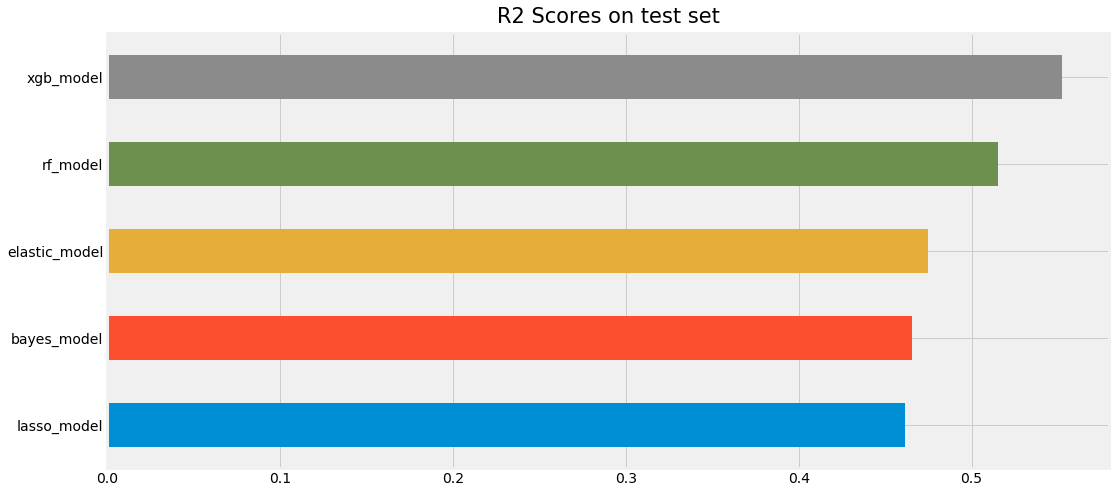

In [73]:
# set the title
plt.title('R2 Scores on test set', fontsize=21, y=1.01)

ax = all_scores['test mean score'].sort_values(ascending=True).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

Due to there are extremely negative R2 score for linear model which mean these models fits worse than the baseline. Hence we excluded these models from our analysis. We replot the horizontal bar graph without showing the negative R2 score to better see the R2 score for chosen model.

We can obviously see the the Random Forest Regressor model and XGB Regressor model outperformed other chosen models. Hence, we further analyse these 2 models. 

Test set


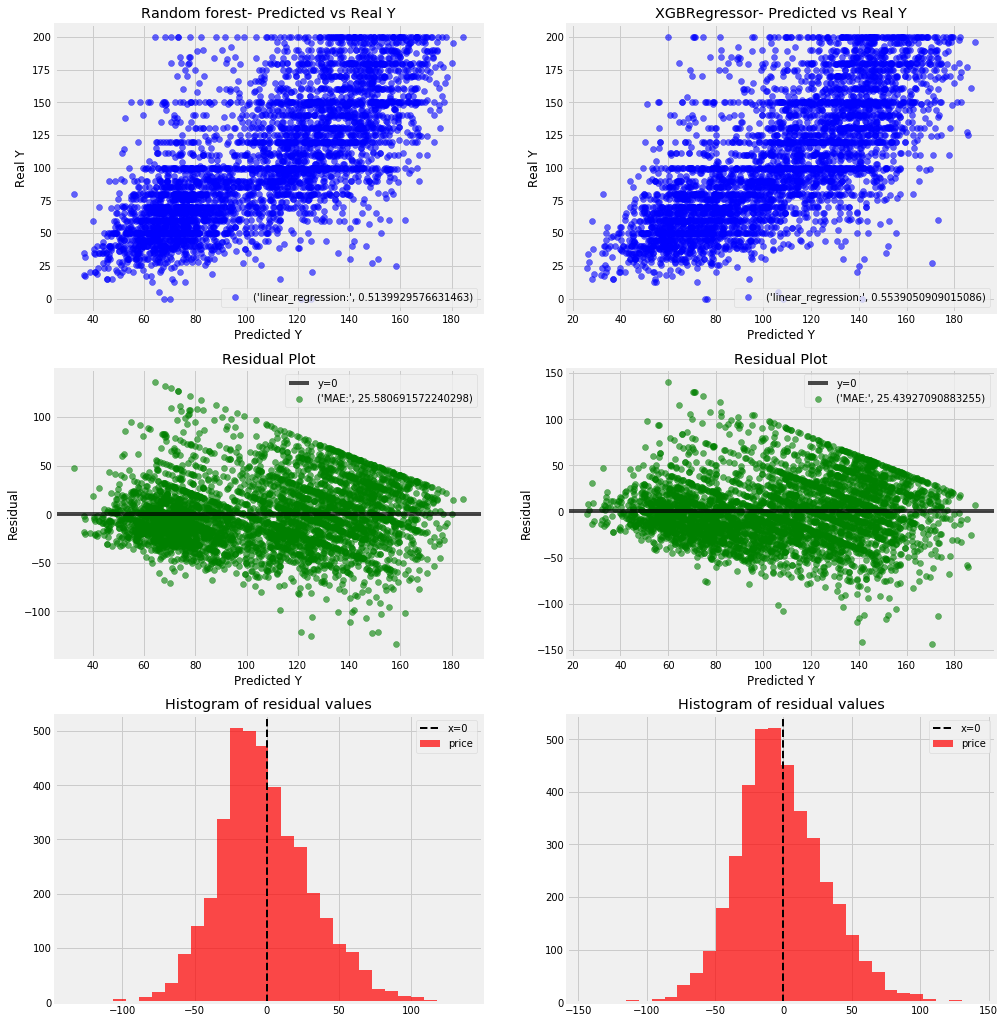

In [74]:
print 'Test set'
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]
ax5 = axes[2][0]
ax6 = axes[2][1]

ax1.scatter(rf2.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", np.mean(cross_val_score(rf2, Xs_test, y_test, cv=9))))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Random forest- Predicted vs Real Y')

ax2.scatter(xgb_grid.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", np.mean(cross_val_score(xgb, Xs_test, y_test, cv=9))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Real Y')
ax2.legend(loc='best')
ax2.set_title('XGBRegressor- Predicted vs Real Y')

ax3.scatter(rf2.predict(Xs_test), y_test-rf2.predict(Xs_test), color='green', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))))
ax3.set_xlabel('Predicted Y')
ax3.set_ylabel('Residual')
ax3.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax3.legend(loc='best')
ax3.set_title('Residual Plot')

ax4.scatter(xgb_grid.predict(Xs_test), y_test-xgb_grid.predict(Xs_test), color='green', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))))
ax3.set_xlabel('Predicted Y')
ax4.set_xlabel('Predicted Y')
ax4.set_ylabel('Residual')
ax4.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax4.legend(loc='best')
ax4.set_title('Residual Plot')

ax5.hist(y_test - rf2.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax5.set_title('Histogram of residual values')
ax5.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax5.legend(loc='best')

ax6.hist(y_test - xgb_grid.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax6.set_title('Histogram of residual values')
ax6.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax6.legend(loc='best')

## Metrics to measure accuracy for continuous variables

In [75]:
print 'Test set'
print '------------------------------------\n'

print "Median Absolute Error"
print "LASSO MAE:", metrics.median_absolute_error(y_test, lasso.predict(Xs_test))
print "ELASTIC MAE:", metrics.median_absolute_error(y_test, elastic.predict(Xs_test))
print "BAYES MAE:", metrics.median_absolute_error(y_test, bayes.predict(Xs_test))
print "RANDOM FOREST MAE:", metrics.median_absolute_error(y_test, rf2.predict(Xs_test))
print "XGB MAE:", metrics.median_absolute_error(y_test, xgb.predict(Xs_test))
print '------------------------------------\n'

print "Mean Absolute Error"
print "LASSO MAE:", mean_absolute_error(y_test, lasso.predict(Xs_test))
print "ELASTIC MAE:", mean_absolute_error(y_test, elastic.predict(Xs_test))
print "BAYES MAE:", mean_absolute_error(y_test, bayes.predict(Xs_test))
print "RANDOM FOREST MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))
print "XGB MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))
print '------------------------------------\n'

print "Root Mean Square Error"
print "LASSO RMSE:", sqrt(mean_squared_error(y_test, lasso.predict(Xs_test)))
print "ELASTIC RMSE:", sqrt(mean_squared_error(y_test, elastic.predict(Xs_test)))
print "BAYES RMSE:", sqrt(mean_squared_error(y_test, bayes.predict(Xs_test)))
print "RANDOM FOREST RMSE:", sqrt(mean_squared_error(y_test, rf2.predict(Xs_test)))
print "XGB RMSE:", sqrt(mean_squared_error(y_test, xgb.predict(Xs_test)))



Test set
------------------------------------

Median Absolute Error
LASSO MAE: 21.939247201304887
ELASTIC MAE: 22.17723204807543
BAYES MAE: 22.02153802265005
RANDOM FOREST MAE: 21.162975397337462
XGB MAE: 20.815994262695312
------------------------------------

Mean Absolute Error
LASSO MAE: 26.39508181808354
ELASTIC MAE: 26.48255751774134
BAYES MAE: 26.383153681351708
RANDOM FOREST MAE: 25.580691572240298
XGB MAE: 25.43927090883255
------------------------------------

Root Mean Square Error
LASSO RMSE: 33.634816733
ELASTIC RMSE: 33.6697468459
BAYES RMSE: 33.6284285968
RANDOM FOREST RMSE: 32.7462333145
XGB RMSE: 32.6409543032


In [76]:
Median_Absolute_Error_list= [metrics.median_absolute_error(y_test, lasso.predict(Xs_test)), metrics.median_absolute_error(y_test, elastic.predict(Xs_test)), metrics.median_absolute_error(y_test, bayes.predict(Xs_test)), metrics.median_absolute_error(y_test, rf2.predict(Xs_test)), metrics.median_absolute_error(y_test, xgb.predict(Xs_test))]
Mean_Absolute_Error_list= [mean_absolute_error(y_test, lasso.predict(Xs_test)), mean_absolute_error(y_test, elastic.predict(Xs_test)), mean_absolute_error(y_test, bayes.predict(Xs_test)), mean_absolute_error(y_test, rf2.predict(Xs_test)), mean_absolute_error(y_test, xgb.predict(Xs_test))]
Root_Mean_Square_Error_list= [sqrt(mean_squared_error(y_test, lasso.predict(Xs_test))), sqrt(mean_squared_error(y_test, elastic.predict(Xs_test))), sqrt(mean_squared_error(y_test, bayes.predict(Xs_test))), sqrt(mean_squared_error(y_test, rf2.predict(Xs_test))), sqrt(mean_squared_error(y_test, xgb.predict(Xs_test)))]

In [77]:
Median_Absolute_Error= pd.DataFrame(Median_Absolute_Error_list, columns=['median_AE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
Median_Absolute_Error

,median_AE
lasso_model,21.939247
elastic_model,22.177232
bayes_model,22.021538
rf_model,21.162975
xgb_model,20.815994


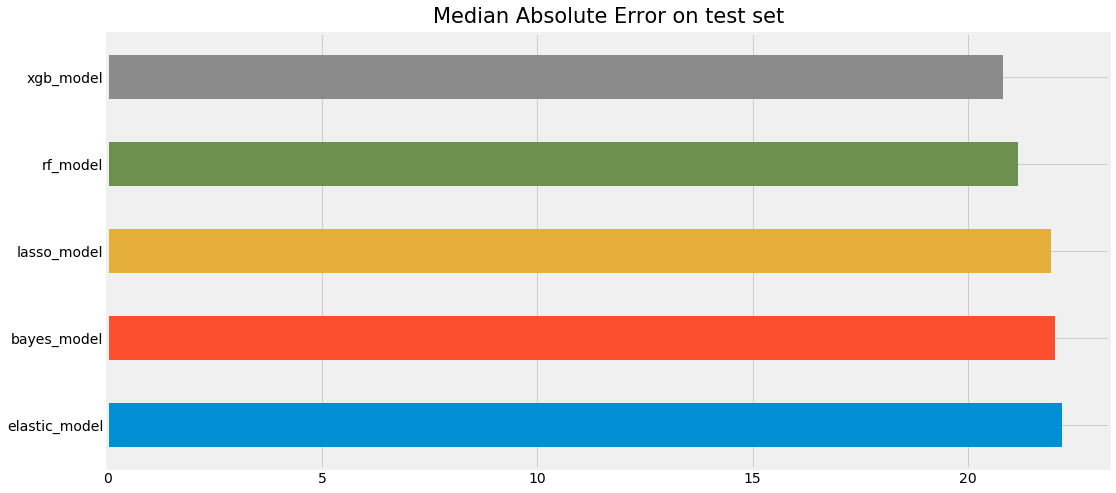

In [82]:
# set the title
plt.title('Median Absolute Error on test set', fontsize=21, y=1.01)

ax = error['median_AE'].sort_values(ascending=False).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

In [78]:
Mean_Absolute_Error= pd.DataFrame(Mean_Absolute_Error_list, columns=['mean_AE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
Mean_Absolute_Error

,mean_AE
lasso_model,26.395082
elastic_model,26.482558
bayes_model,26.383154
rf_model,25.580692
xgb_model,25.439271


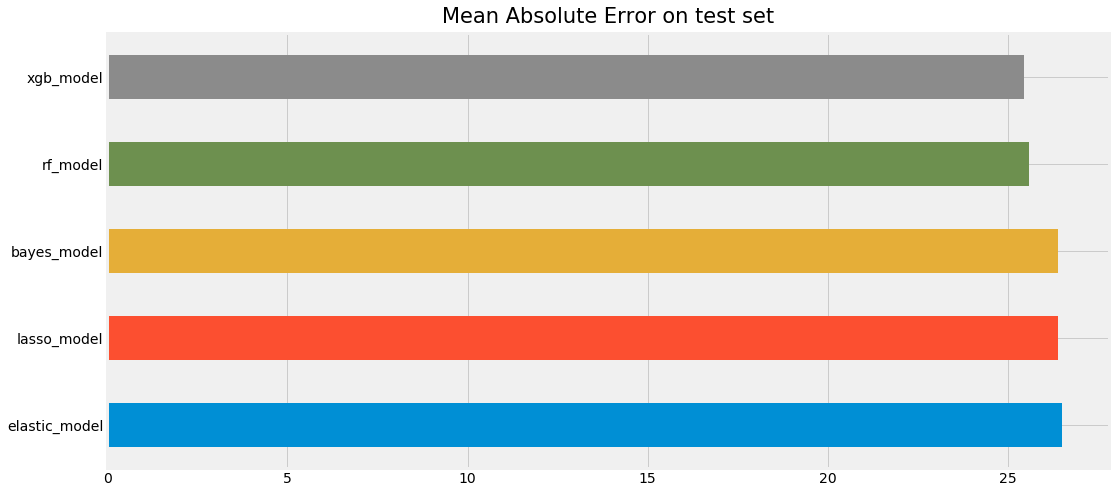

In [83]:
# set the title
plt.title('Mean Absolute Error on test set', fontsize=21, y=1.01)

ax = error['mean_AE'].sort_values(ascending=False).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

In [79]:
Root_Mean_Square_Error= pd.DataFrame(Root_Mean_Square_Error_list, columns=['RMSE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
Root_Mean_Square_Error

,RMSE
lasso_model,33.634817
elastic_model,33.669747
bayes_model,33.628429
rf_model,32.746233
xgb_model,32.640954


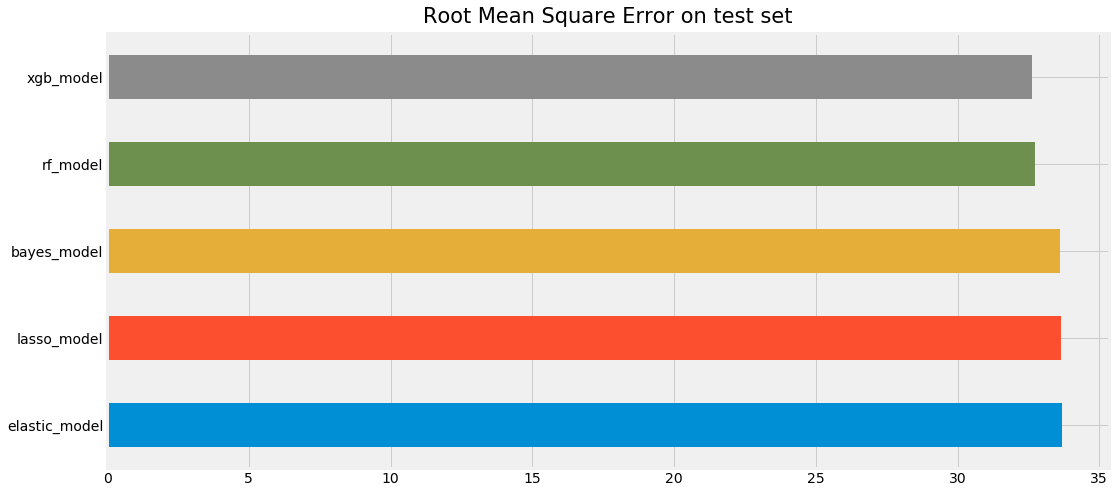

In [84]:
# set the title
plt.title('Root Mean Square Error on test set', fontsize=21, y=1.01)

ax = error['RMSE'].sort_values(ascending=False).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

### Root Mean Square Error (RMSE)
At first, we look at the Root Mean Square Error (RMSE). The errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. However, RMSE is more sensitive to outliers

### Mean Absolute Error and Median Absolute Error
Mean Absolute Error and Median Absolute Error are more steady compare to Root Mean Square Error (RMSE). Absolute values take both positive and negative errors into consideration. MAE yields the advantage of a model that is less sensitive to these outliers and is also more intuitive when comparing a score obtained relative to price. 

Mean is a widely preferred when the sample when the sample is normally distributed as the best measure of central tendency because it is the measure that includes all the values in the data set for its calculation, and any change in any of the scores will affect the value of the mean. 

The more skewed the distribution, the greater the difference between the median and mean, and the greater emphasis should be placed on using the median as opposed to the mean as mean provide a false presentation of typical distribution.

In this cases, the Histogram of residual value seems to be normally distributed and outliner are not necessarily to give larger penalty in this case as the outliners do not have larger effect as it seems to be. Mean Absolute Error is more appropriate. 


In [80]:
error =pd.DataFrame(zip(all_scores['test mean score'], Median_Absolute_Error_list, Mean_Absolute_Error_list, Root_Mean_Square_Error_list), columns=['R2 score', 'median_AE', 'mean_AE', 'RMSE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
error

,R2 score,median_AE,mean_AE,RMSE
lasso_model,0.461309,21.939247,26.395082,33.634817
elastic_model,0.474604,22.177232,26.482558,33.669747
bayes_model,0.465217,22.021538,26.383154,33.628429
rf_model,0.515410,21.162975,25.580692,32.746233
xgb_model,0.552010,20.815994,25.439271,32.640954


In [88]:
error.style.apply(lambda x: [('background: lightblue' if x.name == 'R2 score' and i == 'xgb_model' 
                              else ('background: lightblue' if x.name == 'median_AE' and i == 'xgb_model' else
                                    ('background: lightblue' if x.name == 'mean_AE' and i == 'xgb_model' else 
                                    ('background: lightblue' if x.name == 'RMSE' and i == 'xgb_model' else
                                     ('background: red' if x.name == 'R2 score' and i == 'lasso_model' else
                                      ('background: red' if x.name == 'mean_AE' and i == 'elastic_model' else
                                       ('background: red' if x.name == 'RMSE' and i == 'elastic_model' else
                                     ('background: red' if x.name == 'median_AE' and i == 'elastic_model' else'')))))))) 
                            for i,_ in x.iteritems()])

,R2 score,median_AE,mean_AE,RMSE
lasso_model,0.461309,21.9392,26.3951,33.6348
elastic_model,0.474604,22.1772,26.4826,33.6697
bayes_model,0.465217,22.0215,26.3832,33.6284
rf_model,0.51541,21.163,25.5807,32.7462
xgb_model,0.55201,20.816,25.4393,32.641


In [85]:
print'Average price:', df_sample.price.mean()

average price: 106.3751


## Conclusion

From the comparison above, we could see that XGB Regressor achieve slightly higher R2 score than RandomForest Regressor in the test set. The scatter plot displays the relationship between standardized independent variables and the price. From the residual plot of the test set, we could also see the XGBoost Regressor achieves lower Mean Absolute Error (MAE) than Random Forest Regressor. Based on analysis above, we could reasonably concluded that the XGBoost Regressor have the best performance among all regression model.

However, the overall scores and errors achieved by all models are relatively inconsiderable. It is mainly due to predicting a highly left skewed response variable, price, yields a set of challenges that need to be addressed. Rather than predicting a specific price, future work could consider predicting a bucket price range that a listing would fall into. By turning this into a classification problem, accuracy may very well increase and this model would be more useful from a practical standpoint. Additionally, by predicting prices in bucket range, a host could have a greater degree of autonomy and perhaps confidence in selecting the price that they deemed fit. Finally, further analysis on the trends for seasonality could yield an improved model. There are certainly promising patterns in seasons and day of the week that play a role in determining the optimal Airbnb listing price.
